# Módulo VI: Visualización de Datos

## Tabla de Contenidos:
* [Seaborn](#first-bullet)
* [Relaciones Estadísticas](#second-bullet)
* [Distribuciones de Datos](#third-bullet)
* [Datos Categóricos](#fourth-bullet)
* [Guardar Gráficos](#fifth-bullet)

## Capítulo 1: Seaborn <a class="anchor" id="first-bullet"></a>


**Seaborn** is una librería de visualiazción estadística construída por encima de **matplotlib** e integrada con los DataFrames de **pandas**.

In [2]:
import seaborn as sns

from IPython.display import Image

Existen tres tipos de funciones gráficas en **seaborn**: *relplot* (gráficos relacionales), *displot* (grafícos de distribuciones) y *catplot* (gráficos de datos categóricos)

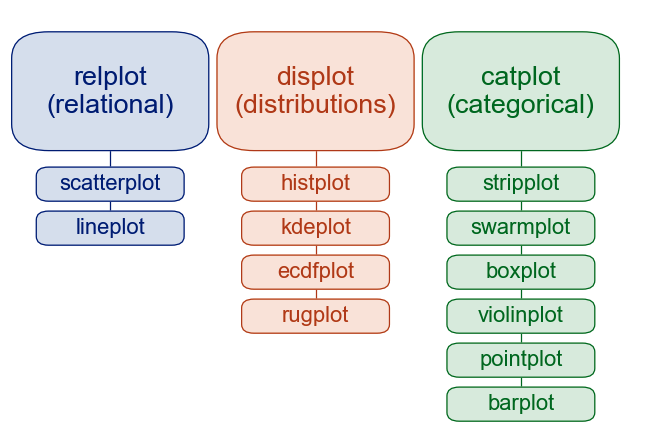

In [9]:
Image("seaborn_functions.png")

Dentro de estas funciones, se puede elegir el tipo de gráfico usando el parámetro **kind**

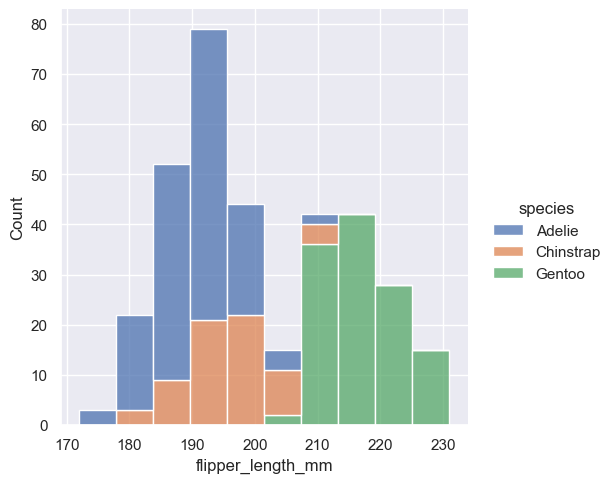

In [11]:
penguins = sns.load_dataset("penguins")
sns.displot(data=penguins, x="flipper_length_mm",
             hue="species", multiple="stack")

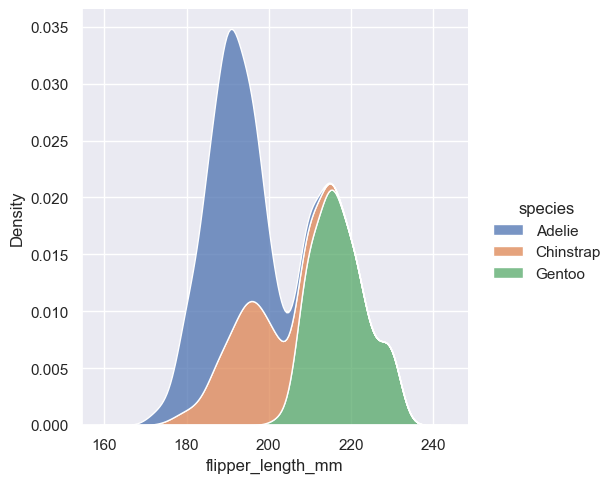

In [12]:
sns.displot(data=penguins, x="flipper_length_mm",
            hue="species", multiple="stack",
            kind="kde")

El resto de variables especifican que columnas se usan para el gráfico o como se agrupan los datos:

* data: DataFrame con los datos
* x: datos del eje-x
* y: datos del eje-y
* hue: agrupar por una variable disreta
* size: ajustar el tamaño de los datos en base a una variable
* col: un gráfico para cada grupo de una variable discreta



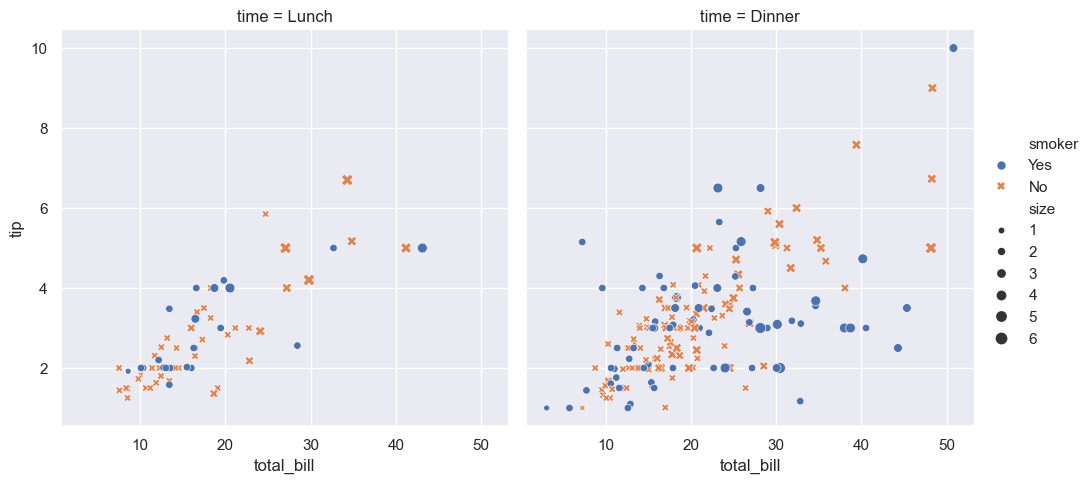

In [10]:
# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

## Capítulo 2: Distribuciones de Datos <a class="anchor" id="second-bullet"></a>

Para visualizar la distribución de variables continuas podemos usar histogramas usando la función **displot( )**

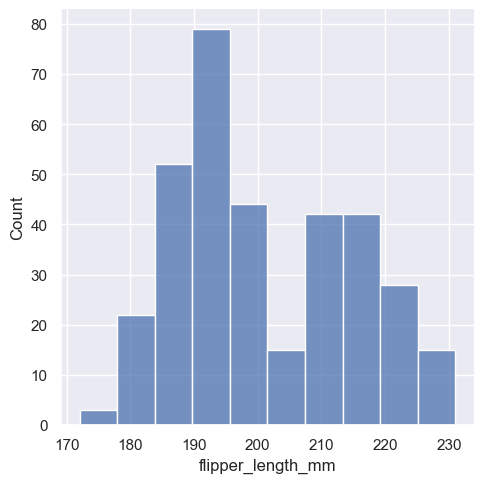

In [13]:
penguins = sns.load_dataset("penguins")

sns.displot(penguins, x="flipper_length_mm")

Podemos cambiar la resolución del histograma cambiando el valor de la variable **bins**

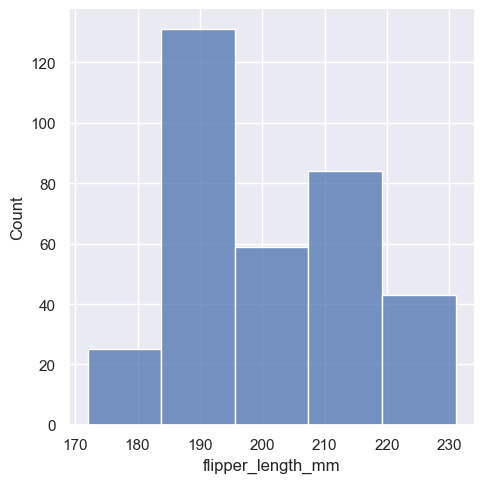

In [14]:
sns.displot(penguins, x="flipper_length_mm", bins = 5)

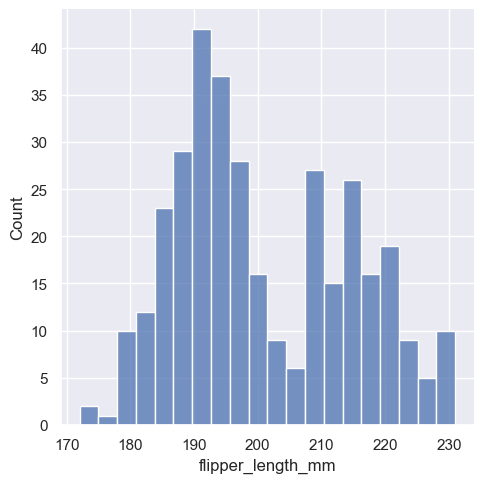

In [15]:
sns.displot(penguins, x="flipper_length_mm", bins = 20)

Para agrupar los datos en base a una variable discreta usaremos la variable **hue**

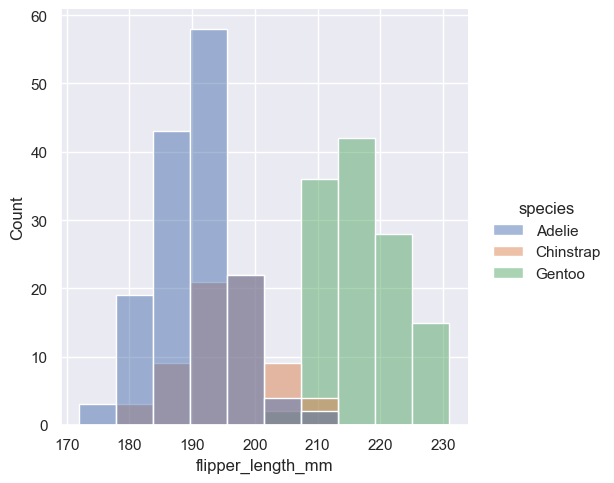

In [16]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

También es posible separar los datos en varios gráficos usando la variable **col**

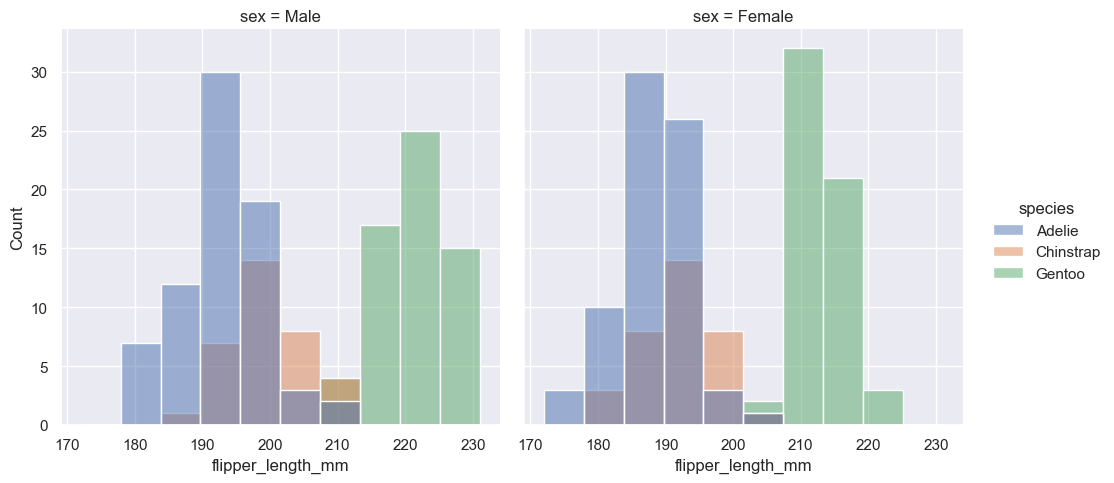

In [17]:
sns.displot(penguins, x="flipper_length_mm",
            hue="species", col = "sex")

Para normalizar el gráfico podemos asignar a la variable **stat** el valor "density"

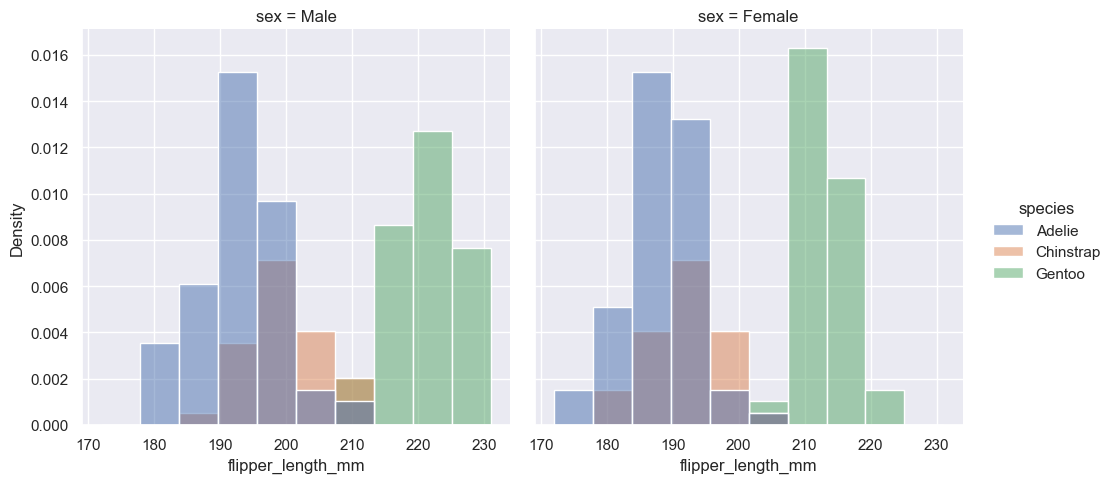

In [18]:
sns.displot(penguins, x="flipper_length_mm",
            hue="species", col = "sex",
            stat = "density")

Una alternativa a los histogramas es usar un kernel density estimation asignando a la variable **kind** el valor "kde"

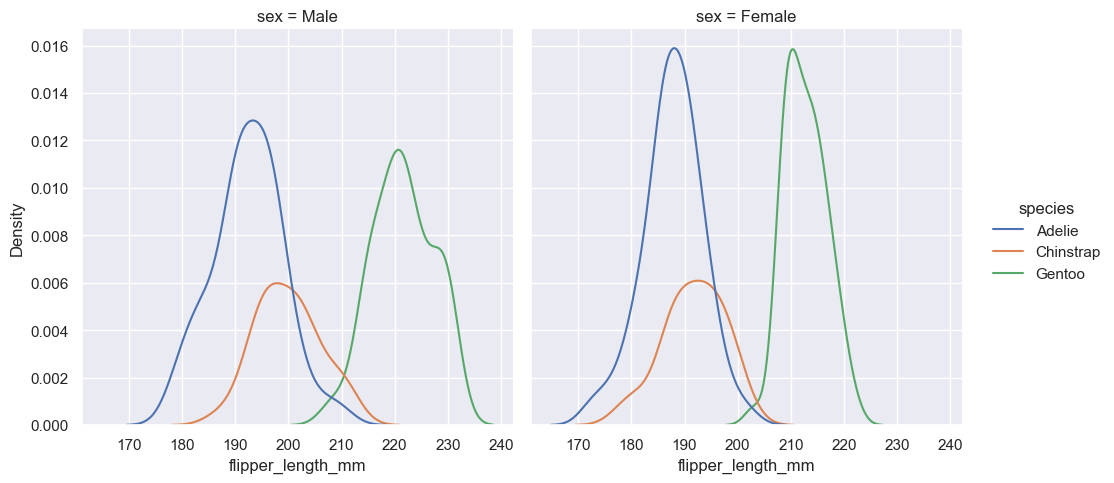

In [20]:
sns.displot(penguins, x="flipper_length_mm",
            hue="species", col = "sex",
            kind = "kde")

También podemos incorporar el kde al histograma usando asignando a la variable **kde** el valor True

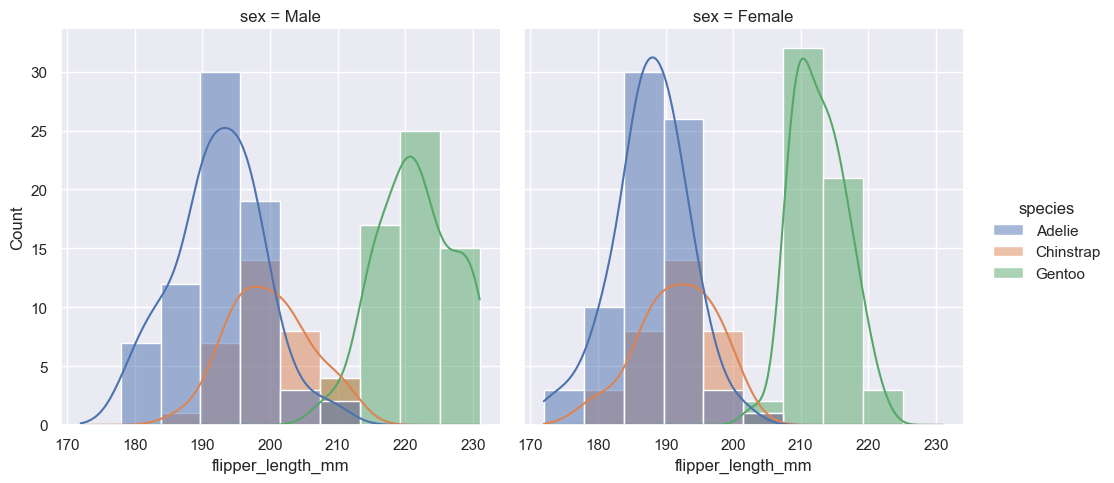

In [25]:
sns.displot(penguins, x="flipper_length_mm",
            hue="species", col = "sex",
            kde = True)

Otra alternativa más es usar un gráfico ECDF (empirical cumulative distribution function) para observar la distribución cumulativa de la variable. En esto caso le asignaremos el valor "ecdf" a la variable **kind**

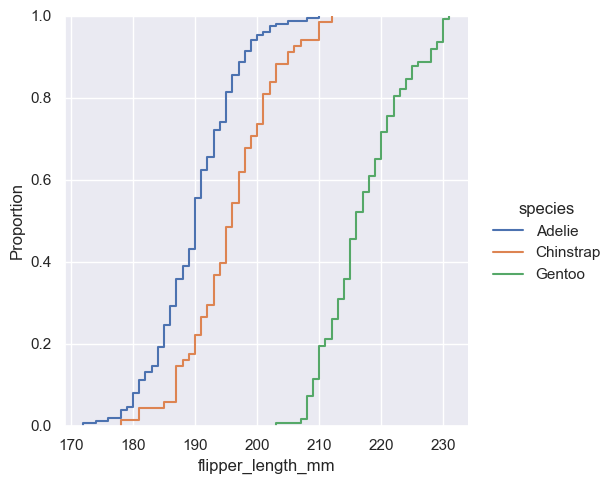

In [26]:
sns.displot(penguins, x="flipper_length_mm",
            hue="species", kind="ecdf")

Para visualizar distribuciones de más de una variable podemos incorporar una segunda variable asignandole un valor a la variable **y**

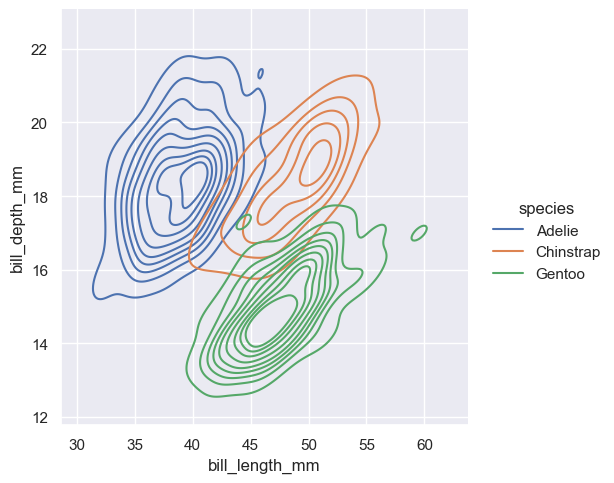

In [27]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm",
            hue="species", kind="kde")


También podemos visualizar más de un gráfico usando la función **jointplot( )**

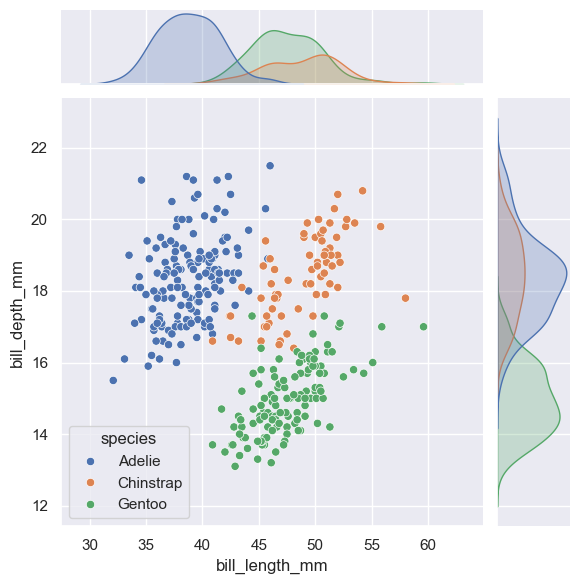

In [31]:
sns.jointplot(data=penguins, x="bill_length_mm",
              y="bill_depth_mm",  hue="species")


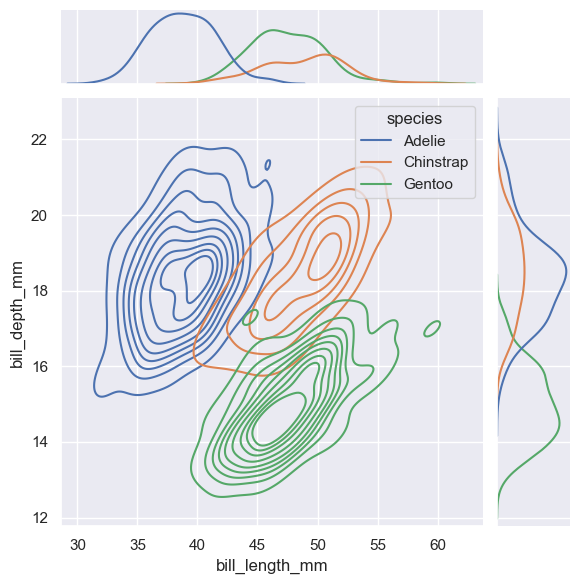

In [32]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

En el caso en que queramos visualizar más de dos variables continuas podemos usar la función **pairplot( )**

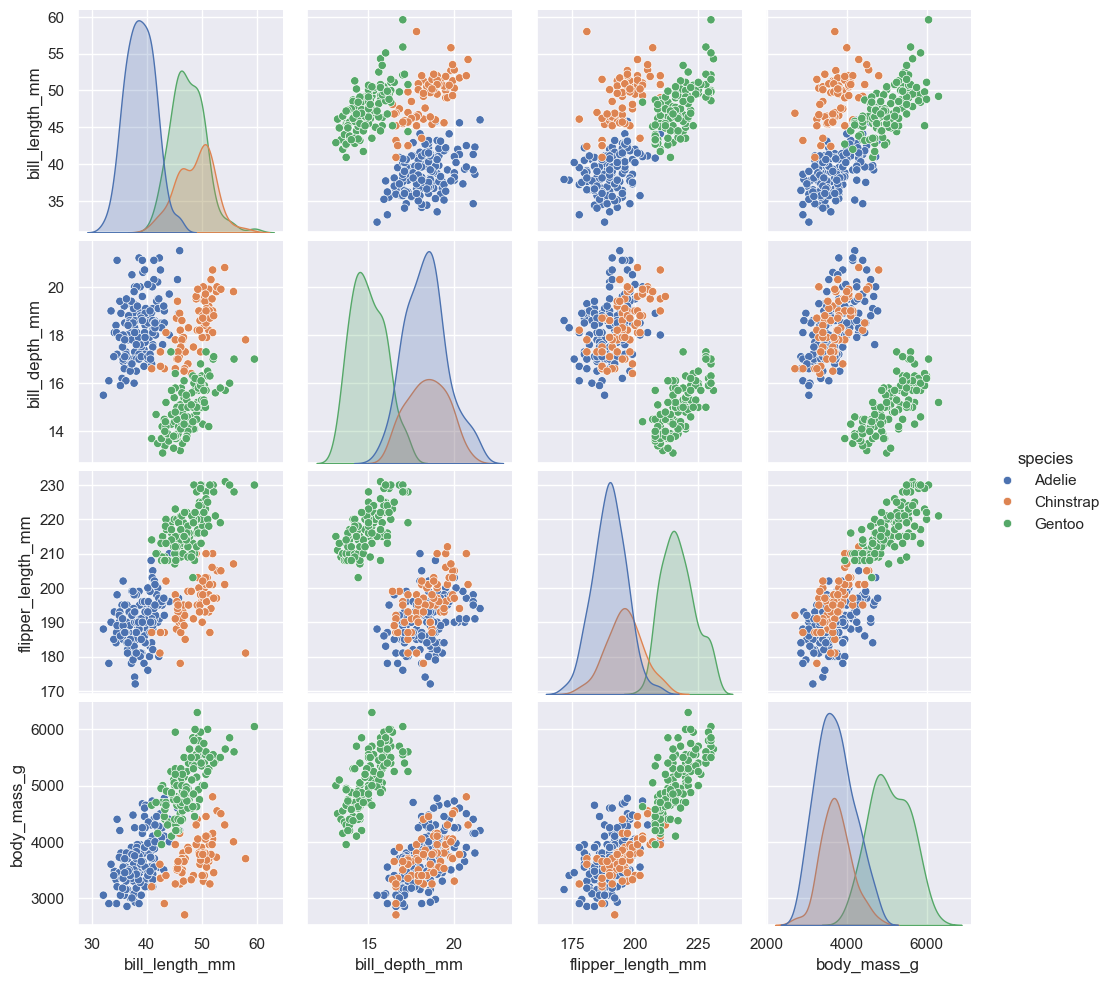

In [34]:
sns.pairplot(penguins, hue = "species")

Para customizar los gráficos que se muestran en los gráficos podemos usar el objeto **PairGrid**

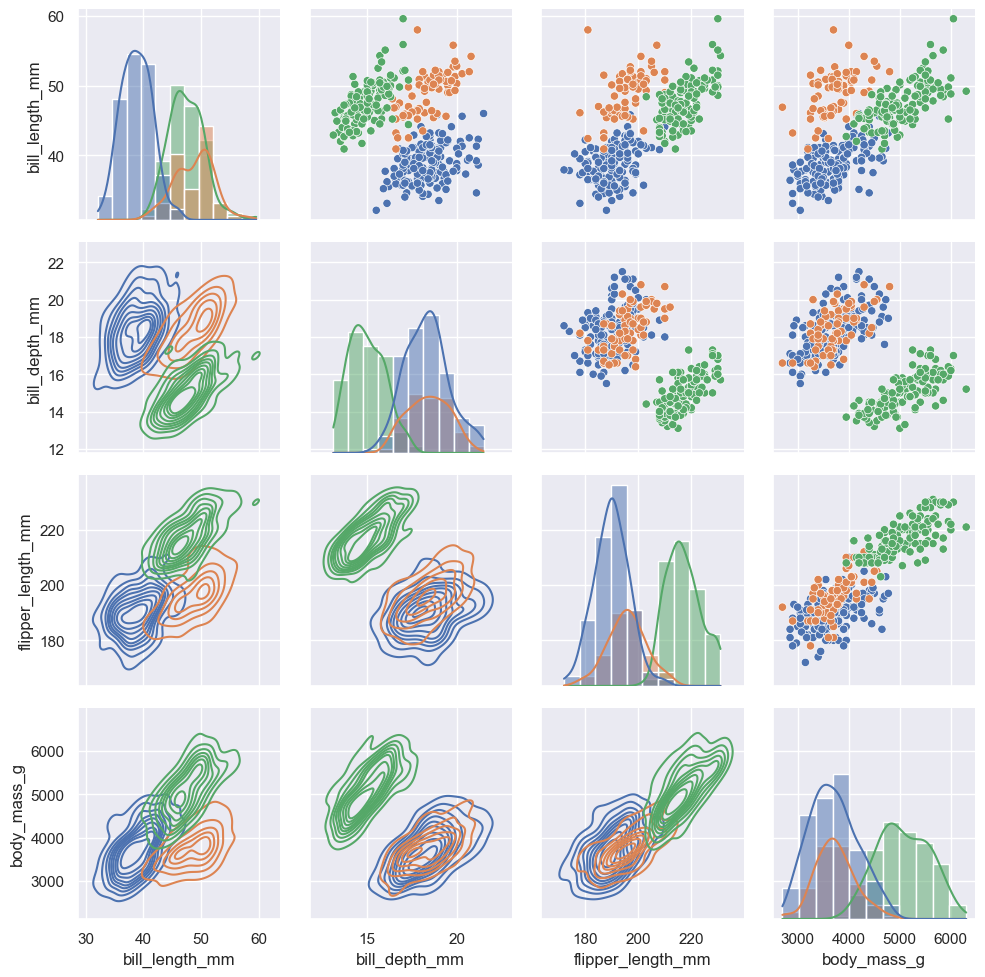

In [39]:
g = sns.PairGrid(penguins, hue = "species")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)

## Capítulo 3: Datos categóricos <a class="anchor" id="third-bullet"></a>

Para visualizar el efecto de las variables cátegoricas en la distribución de otras variables podemos usar la función **catplot( )**

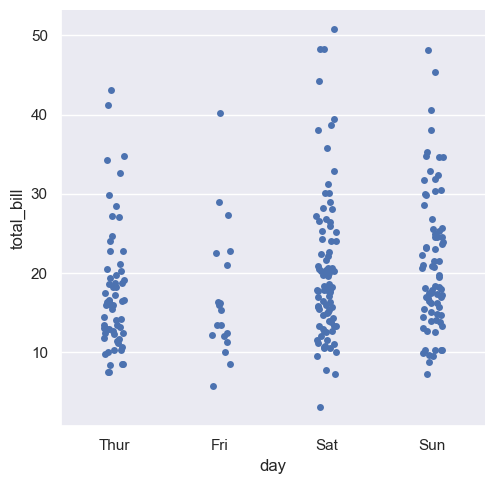

In [40]:
tips = sns.load_dataset("tips")

sns.catplot(data=tips, x="day", y="total_bill")

También es posible agrupar los datos en más categorías usando la variable **hue**

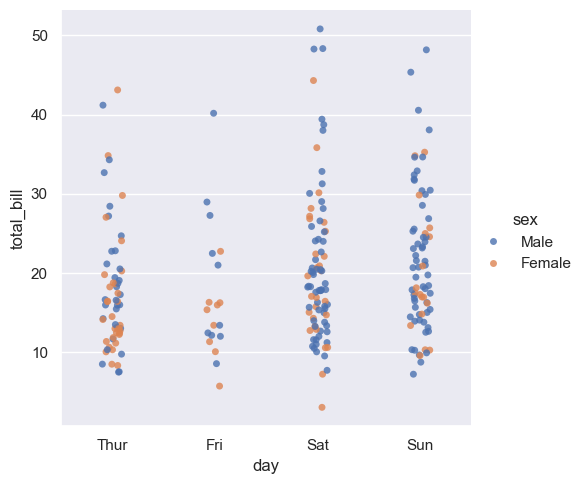

In [43]:
sns.catplot(data=tips, x="day", y="total_bill",
             hue="sex", alpha = 0.8)


Una alternativa para resumir la distribución es usar diagramas de cajas asignándole el valor "box" a la variable **kind**

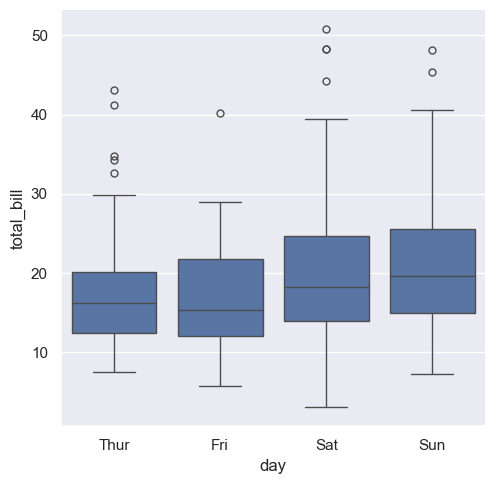

In [44]:
sns.catplot(data=tips, x="day", y="total_bill",
            kind="box")

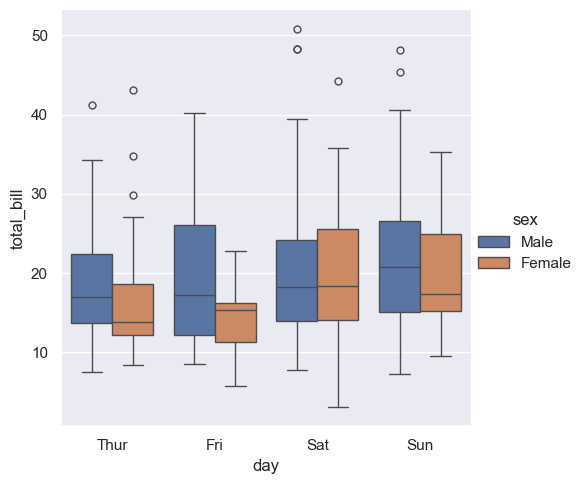

In [45]:
sns.catplot(data=tips, x="day", y="total_bill",
            kind="box", hue = "sex")

Otra opción es usar violonplots asignándole el valor "violin" a la variable **kind**

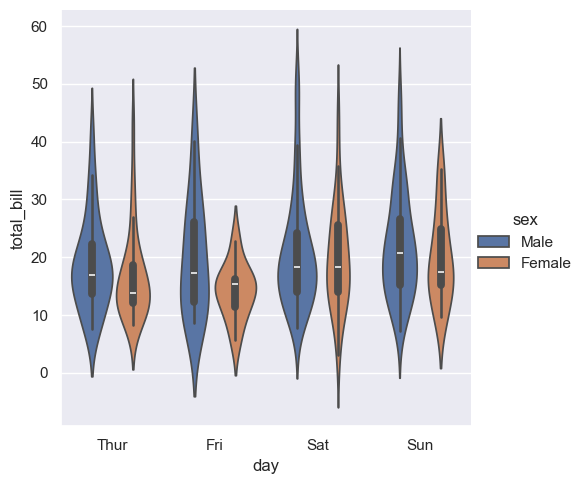

In [46]:
sns.catplot(data=tips, x="day", y="total_bill",
            kind="violin", hue = "sex")

En el caso de categorías binarias podemos asignar a la variable **split** el valor True

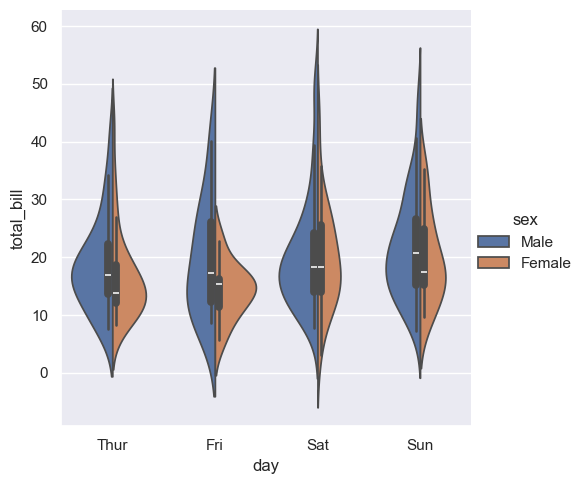

In [47]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", split=True,
)

## Capítulo 4: Guardar Gráficos <a class="anchor" id="fourth-bullet"></a>


Para guardar los gráficos primero los salvaremos como un objeto y despúes lo salvaremos con el método **savefig( "nombre.png" )**

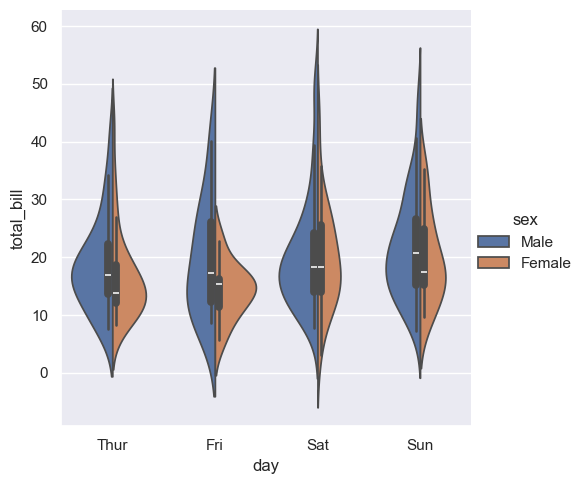

In [51]:
violin = sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", split=True,
)



violin.savefig("violin.png") 